# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [152]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\1123k\AppData\Local\Temp\ipykernel_10244\577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [153]:
# Q1
pd.set_option('display.max_columns', None)
df.head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [4]:
# Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50796 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  long

In [154]:
#Q2
miss_ratio = df.isnull().sum()*100/len(df)
miss_ratio = miss_ratio[miss_ratio>0]
miss_count = df.isnull().sum()
miss_count = miss_count[miss_count>0]
miss_table = pd.DataFrame({'missing_num':miss_count,'missing_%': miss_ratio})
miss_table_sorted = miss_table.sort_values('missing_%', ascending=False)
miss_table_sorted

,missing_num,missing_%
jurisdiction_names,50781,99.970470
license,50759,99.927160
square_feet,50407,99.234192
monthly_price,46119,90.792582
weekly_price,45411,89.398772
host_response_rate,19006,37.416332
host_response_time,19006,37.416332
security_deposit,17325,34.107016
host_acceptance_rate,14015,27.590755
review_scores_value,11482,22.604142


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

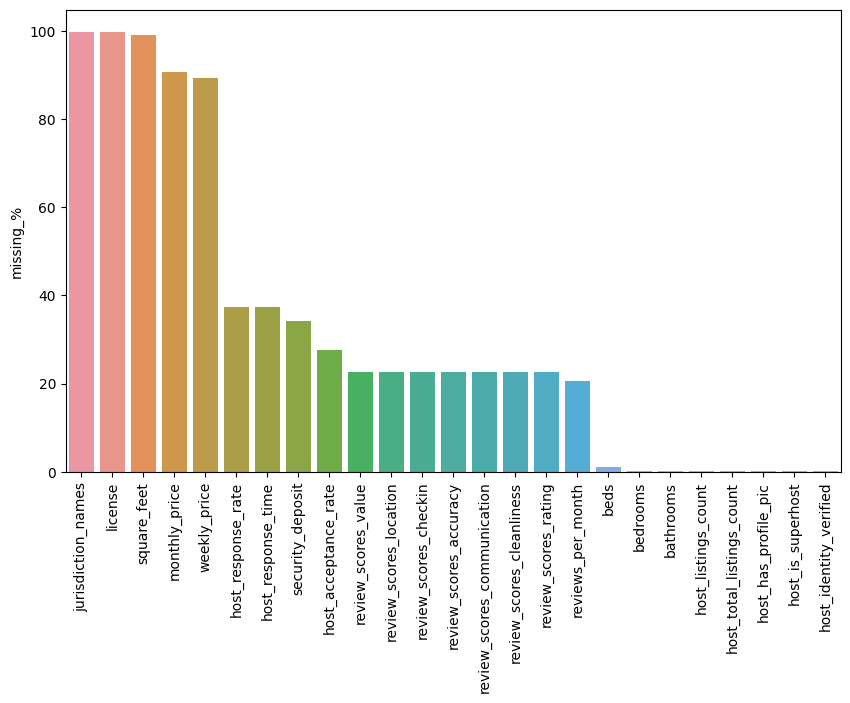

In [155]:
# Q3
plt.figure(figsize=(10,6))
sns.barplot(x=miss_table_sorted.index, y='missing_%', data=miss_table_sorted)
plt.xticks(rotation=90)
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [156]:
# Q4
df[df.beds.isnull()].head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [157]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [158]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<Axes: xlabel='room_type', ylabel='count'>

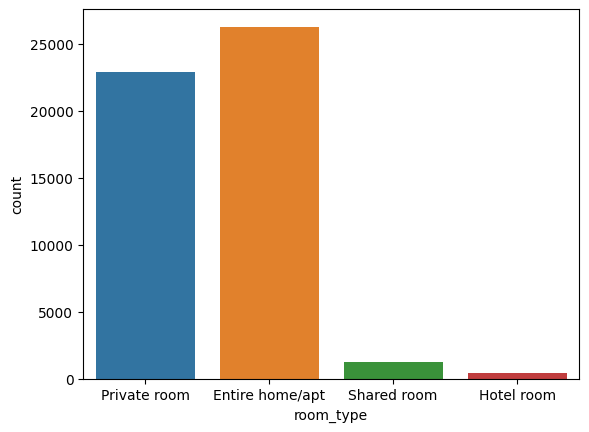

In [160]:
# Q5
sns.countplot(data=df,x='room_type')


- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

<Axes: ylabel='room_type'>

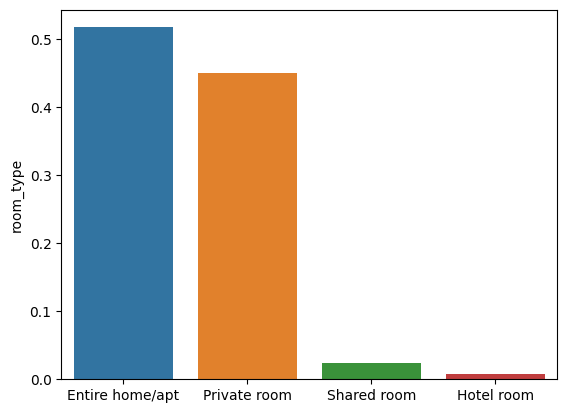

In [161]:
# Q6
total = len(df)
y =  df['room_type'].value_counts() / total

sns.barplot(x=y.index, y=y)

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

<Axes: xlabel='neighborhood', ylabel='count'>

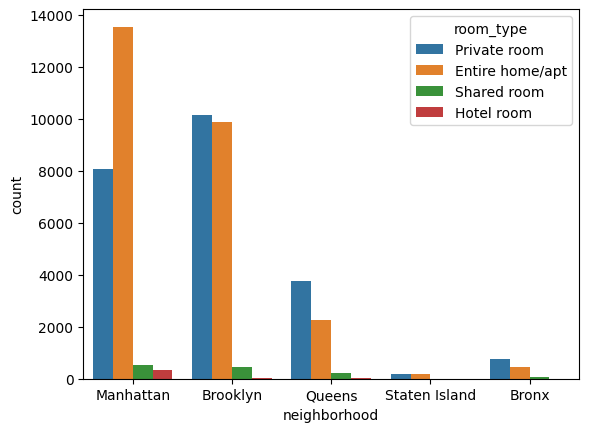

In [162]:
# Q7
sns.countplot(hue='room_type',x='neighborhood', data=df)


- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

C:\Users\1123k\AppData\Local\Temp\ipykernel_10244\1508672134.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='neighborhood', y='price', jitter=0.1, palette='hls')


<Axes: xlabel='neighborhood', ylabel='price'>

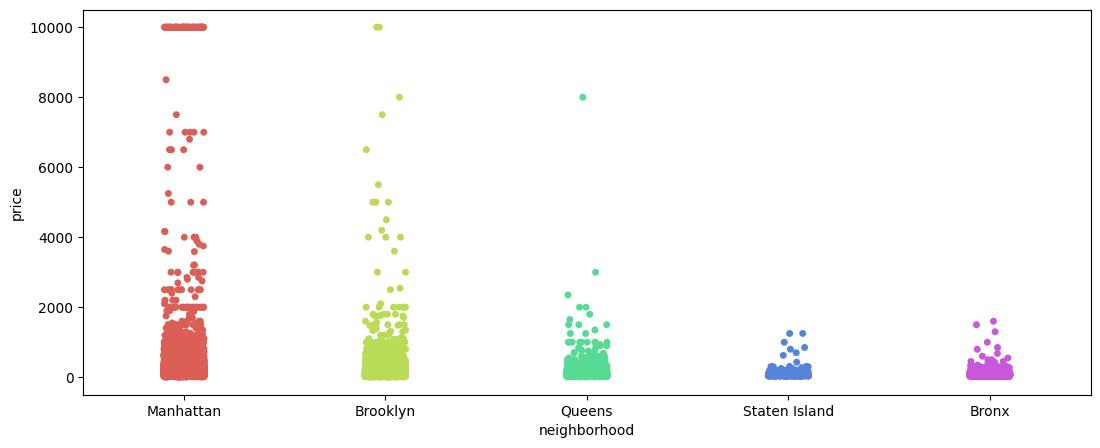

In [165]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize=(13,5))
sns.stripplot(data=df, x='neighborhood', y='price', jitter=0.1, palette='hls')

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

Manhattan은 Entire home의 비중이 유독 높은 편이라 가족 단위, 혹은 그 이상이 여행지로 많이 가는 지역임을 추론할 수 있다. 또한 Entire home을 빌리는 비용이 Private room보다 훨씬 비쌀텐데, 두 가지의 방의 비중이 비슷한 Brooklyn에서 price의 분산이 크게 나타난 것은 Brooklyn 지역이 크기 때문에 교통의 접근성에 따라 가격의 격차가 천차만별인 것이라고 생각할 수 있다. 

# Q9

Manhattan과 같은 인기 있는 여행지는 가격이 비싼 Entire home/apt나 Hotel room의 수요가 크므로, 방 가격을 비싸게 책정하는 것이 좋을 것입니다. 왜냐하면, 지역별 room type 그래프에서 볼 수 있듯이 Manhattan은 Entire home/apt가 가장 많고, 지역별 가격 그래프에서 볼 수 있듯이 Manhattan이 비교적 비싼 가격에 분포해있기 때문입니다.

반면에 Brnox의 경우, 가격이 싼 Private room의 수요가 크므로 방 가격을 싸게 책정하는 것이 좋을 것입니다. 왜냐하면, 지역별 room type 그래프에서 볼 수 있듯이 Brnox는 Private room이 가장 많고, 지역별 가격 그래프에서 볼 수 있듯이 Brnox가 비교적 싼 가격에 분포해있기 때문입니다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

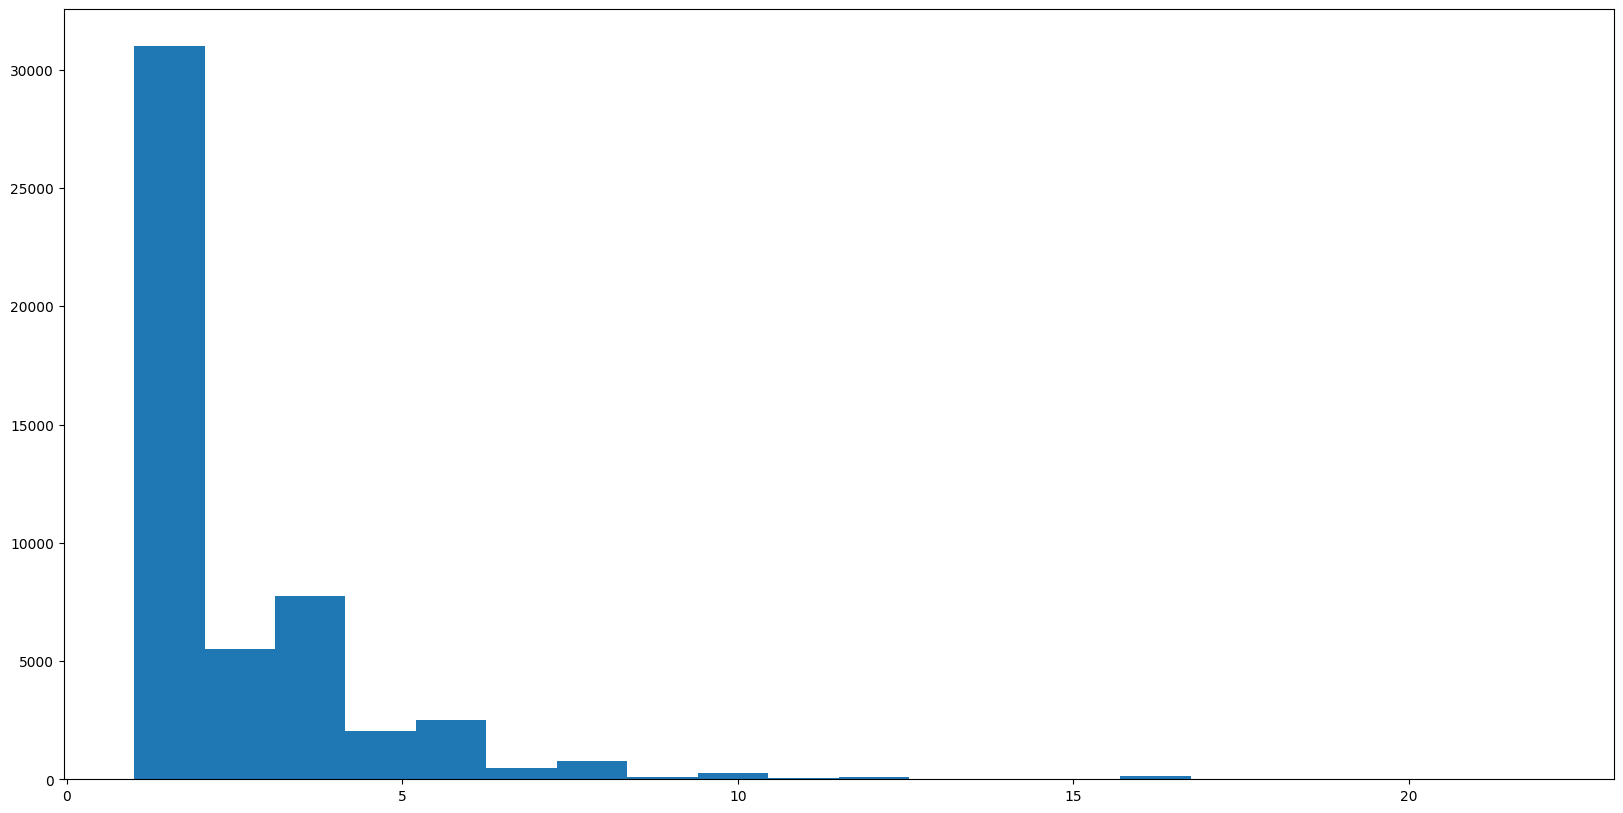

In [166]:
# Q10
plt.figure(figsize=(20,10))
plt.hist(x='accommodates', data=df, bins=20)
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

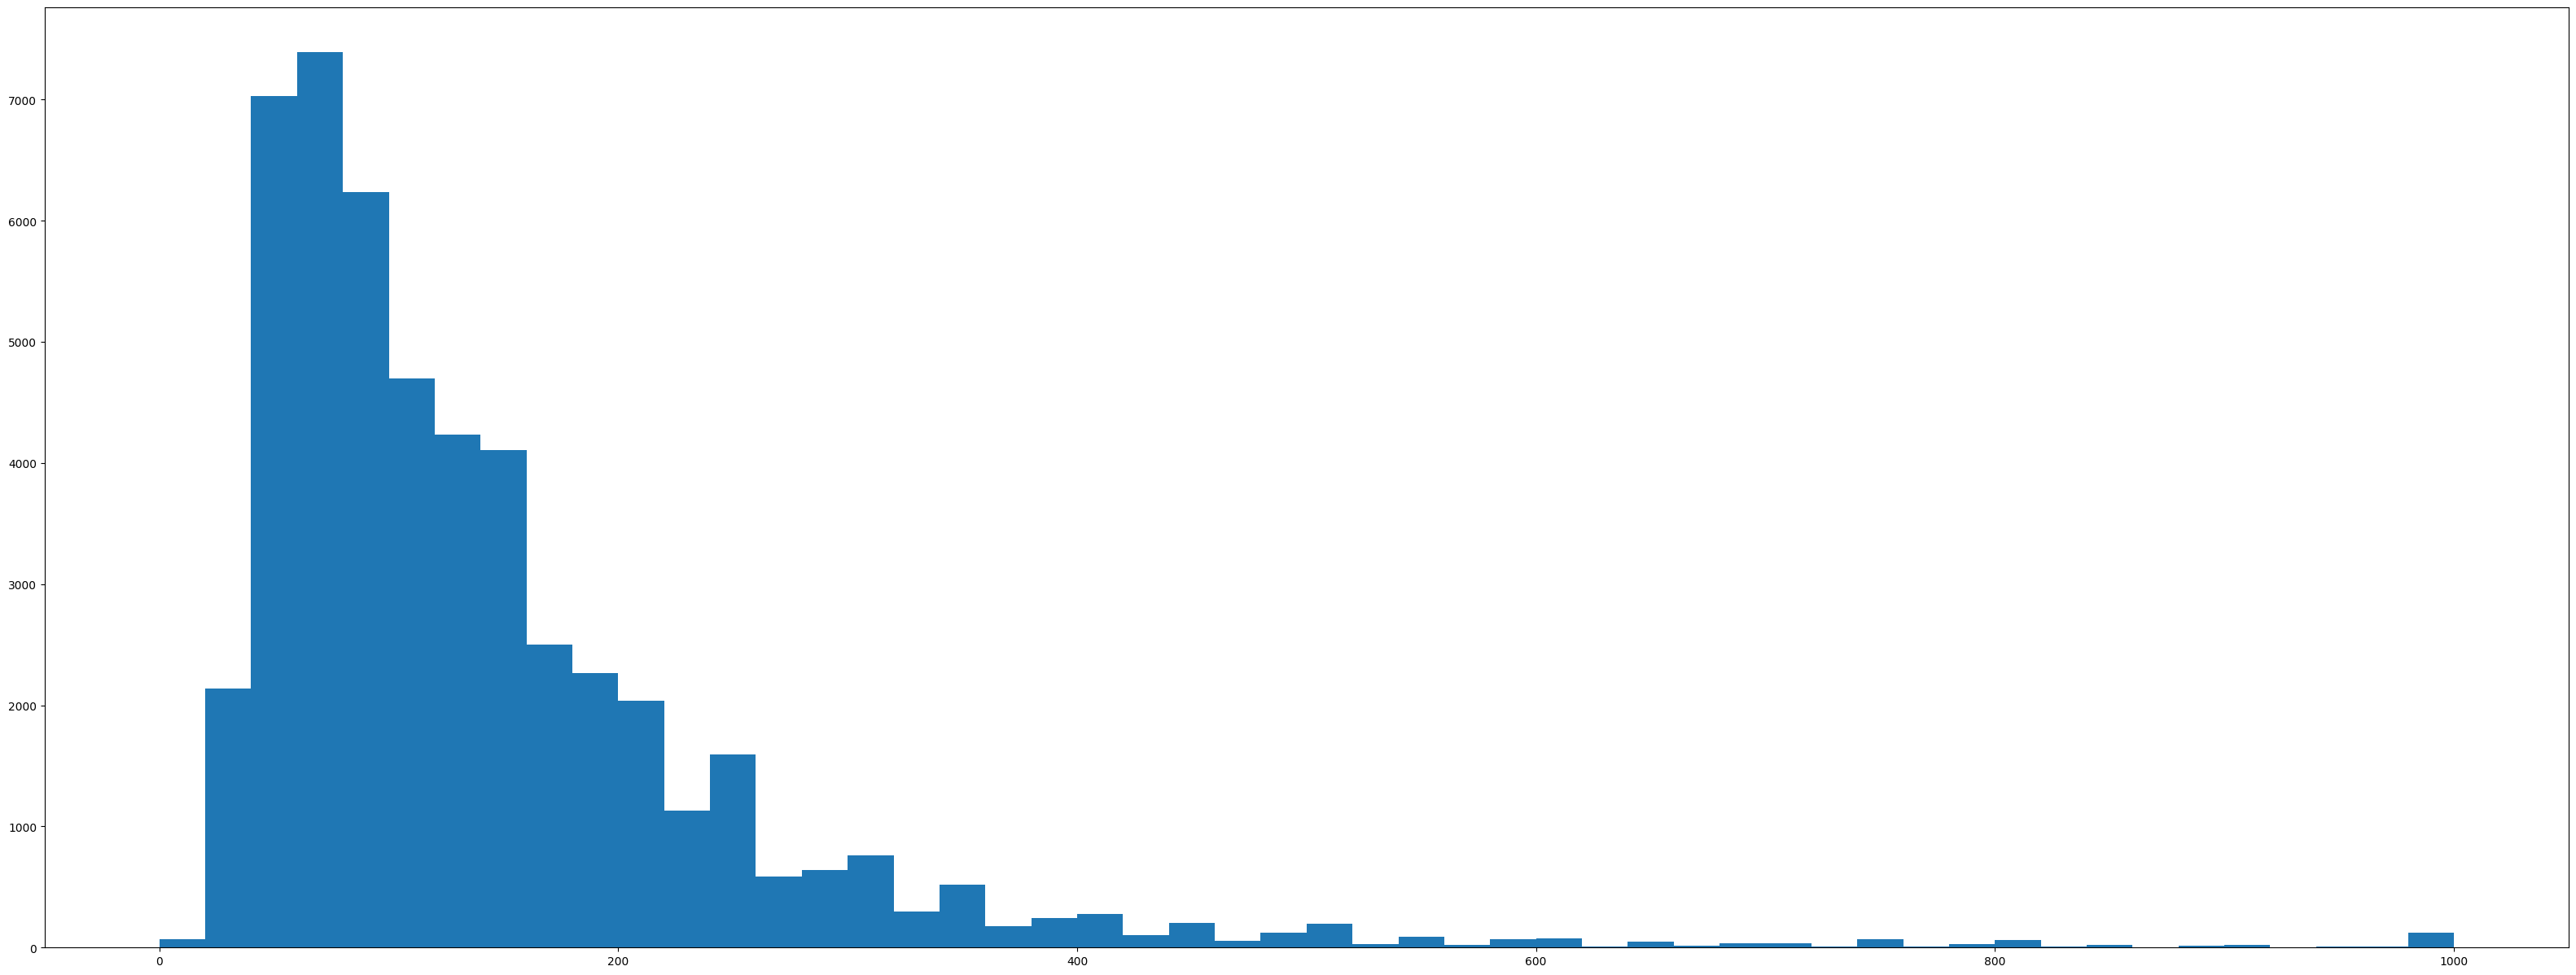

In [167]:
# Q11
plt.figure(figsize=(40,15))
plt.hist(x='price', data=df, range=(0,1000), bins=50)
plt.show()

---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [168]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\1123k\AppData\Local\Temp\ipykernel_10244\577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [169]:
#Q12
stan10 = int(0.1*len(df)+1)
df = df.loc[:, df.isnull().mean()<.25]
df.dropna(axis=0, thresh=stan10)
replace_col = df.columns[df.isnull().mean()<stan10]
med = df[replace_col].median()
df[replace_col] = df[replace_col].fillna(med)

C:\Users\1123k\AppData\Local\Temp\ipykernel_10244\2970612368.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med = df[replace_col].median()


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [170]:
#Q13-1) 수용인원이 11명 이상인 방은 그 수가 너무 적어서 아웃라이어로 보고 삭제
df['accommodates'].value_counts()

2     23351
4      7754
1      7655
3      5504
6      2502
5      2050
8       752
7       485
10      254
16      156
12      108
9       107
11       46
14       32
13       20
15       17
19        1
22        1
20        1
Name: accommodates, dtype: int64

In [171]:
df = df[df.accommodates<10]
df['accommodates'].value_counts()

2    23351
4     7754
1     7655
3     5504
6     2502
5     2050
8      752
7      485
9      107
Name: accommodates, dtype: int64

In [172]:
#Q13-2) prcie 열은 분산이 크고 단위 자체가 커서 모델 성능을 위해 스케일링
df['price'].describe()

count    50160.000000
mean       160.594258
std        422.886837
min          0.000000
25%         68.000000
50%        103.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [173]:
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()
sd_scaler = sd_scaler.fit_transform(df['price'].values.reshape(-1,1))
df['price'] = sd_scaler
df['price'].describe()

count    5.016000e+04
mean    -1.473215e-17
std      1.000010e+00
min     -3.797608e-01
25%     -2.189597e-01
50%     -1.361944e-01
75%      3.406558e-02
max      2.326746e+01
Name: price, dtype: float64

In [174]:
#Q13-3) 범주형 변수는 모델에 input으로 넣기 위해 인코딩 필요 ex) room_type
pd.get_dummies(df['room_type'])

,Entire home/apt,Hotel room,Private room,Shared room
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
50791,0,0,1,0
50792,1,0,0,0
50793,1,0,0,0
50794,0,0,1,0


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---